 # 1) Importation des libraires de datascience 


In [2]:
import pandas as pd 
from numpy import*
import matplotlib as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd

<module 'pandas' from 'C:\\Users\\ibenz\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [5]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\ibenz\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
array = array([[12, 33], [21, 45]]) 

In [7]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\ibenz\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

# 2) Lecture des fishiers csv

## 1- Aide_alimentaire

In [8]:
aide= pd.read_csv('aide_alimentaire.csv')
aide.head(2)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335


In [9]:
aide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


## 2-Dispo_alimentaire 

In [10]:
dispo= pd.read_csv('dispo_alimentaire.csv')
dispo.head(2)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN


In [11]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

## 3-Population 

In [12]:
pop=pd.read_csv('population.csv')
pop.head(2)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794


In [13]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


## 4-sous_nutrition

In [14]:
sous_nut=pd.read_csv('sous_nutrition.csv')
sous_nut.head(2)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8


In [15]:
sous_nut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


# Questions de Marc 

##  Question 1) la proportion de personnes en état de sous-nutrition

### Nettoyage du fichier sous-nutrition

In [16]:
# Changer nom de la colonne Valeur dans la data sou_nut
sous_nut= sous_nut. rename(columns={'Valeur':'Nombre_en_million_en_sous_nutrition'})
sous_nut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Zone                                 1218 non-null   object
 1   Année                                1218 non-null   object
 2   Nombre_en_million_en_sous_nutrition  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [17]:
# Remplacer les '<0.1' par un entier '0.05'
sous_nut['Nombre_en_million_en_sous_nutrition'].replace({"<0.1": "0.05"}, inplace=True)

In [18]:
# Changer type de la colonne nombre en million en numeric pour pouvoir faire le calcul
sous_nut["Nombre_en_million_en_sous_nutrition"]= pd.to_numeric ( sous_nut["Nombre_en_million_en_sous_nutrition"])

In [19]:
# Renommer colonne Valeur dans la data pop
pop = pop. rename(columns={'Valeur':'Population'})

In [20]:
# la population mondiale en fonction des années (data : pop)
population_par_année=pd.pivot_table(pop, index='Année',values='Population', aggfunc='sum')
population_par_année
population_par_année.reset_index()

,Année,Population
0,2013,7210845.848
1,2014,7295557.771
2,2015,7380067.075
3,2016,7464294.742
4,2017,7548134.111
5,2018,7631368.523


In [21]:
# Table pivot pour mettre le nombre de la population en sous nutrition en fonction des années
sou_nut_par_année= pd.pivot_table(sous_nut, index='Année', values='Nombre_en_million_en_sous_nutrition', aggfunc='sum')
sou_nut_par_année
sou_nut_par_année.reset_index()

,Année,Nombre_en_million_en_sous_nutrition
0,2012-2014,529.10
1,2013-2015,524.55
2,2014-2016,525.70
3,2015-2017,529.60
4,2016-2018,536.70
5,2017-2019,545.15


In [22]:
# Utiliser la fonction replace pour replacer les intervalles des années en une année médianne 
sous_nut['Année'].replace({"2012-2014": "2013","2013-2015":"2014","2014-2016":"2015","2015-2017":"2016","2016-2018":"2017","2017-2019":"2018"}, inplace=True)
sous_nut.head(2)

,Zone,Année,Nombre_en_million_en_sous_nutrition
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8


In [23]:
# Changer l'unité de la colonne Population du tableau pop en millions
pop['Population'] =  pop['Population'].astype(float)/1000

#### Réaliser la jointure entre la dataframe population et la sous-nutrition pour plus d'analyses

In [24]:
# Changer type de la colonne Année en numeric pour pouvoir merger
sous_nut["Année"]= pd.to_numeric ( sous_nut["Année"])

In [25]:
# Tableau merge pour faire la jointure entre le dataframe population et la sous-nutrition avec inner 
sous_nut_population= pd.merge(sous_nut.reset_index(drop=True),pop, on= ['Zone','Année'], how= 'inner')
sous_nut_population

,Zone,Année,Nombre_en_million_en_sous_nutrition,Population
0,Afghanistan,2013,8.6,32.269589
1,Afghanistan,2014,8.8,33.370794
2,Afghanistan,2015,8.9,34.413603
3,Afghanistan,2016,9.7,35.383032
4,Afghanistan,2017,10.5,36.296113
...,...,...,...,...
1213,Zimbabwe,2014,NaN,13.586707
1214,Zimbabwe,2015,NaN,13.814629
1215,Zimbabwe,2016,NaN,14.030331
1216,Zimbabwe,2017,NaN,14.236595


In [26]:
# somme de la population en 2017
pop_2017= sous_nut_population[sous_nut_population["Année"]== 2017]["Population"].sum()
print(round(pop_2017,2),'millions de personnes')

7543.8 millions de personnes


In [27]:
# somme des personnes mal-nourries en 2017
sous_nut_2017=sous_nut_population[sous_nut_population["Année"]== 2017]['Nombre_en_million_en_sous_nutrition'].sum()
print(round(sous_nut_2017,2),'millions de personnes')

536.7 millions de personnes


####  Réponse question 1) la proportion de personnes en état de sous-nutrition en pourcentage

In [28]:
# la proportion de personnes en état de sous-nutrition en pourcentage
proportion_sous_nutrition_2017=( sous_nut_2017/pop_2017)*100
print(round(proportion_sous_nutrition_2017,2),'%')

7.11 %


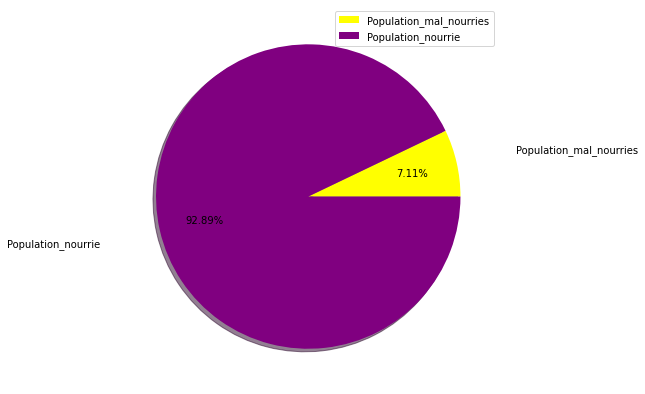

In [190]:
plt.figure(figsize = (10, 7))#Définir la taille du graphique
sous_nut_2017= [7.11 , (100-7.11)] #Liste des valeurs à afficher dans le graphique
plt.pie(sous_nut_2017, labels = ['Population_mal_nourries', 'Population_nourrie'],#Définition du camembert avec la fonction plt.pie
           colors = ['yellow', 'purple'],#couleurs à utiliser dans le camembert
           explode = [0, 0],#tableau du même nobre de valeurs à afficher qui indique l'éloignement de la part par rapport aux autres valeurs 
           autopct = lambda dispo: str(round(dispo, 2)) + '%',#indique le  porcentage et ses nombre de décimales
           pctdistance = 0.7, labeldistance = 1.4,#distance du pourcentage par rapport au centre
           shadow = True)#pour affiher l'ombre du camembert si True
plt.legend()

# Question 2) le nombre théorique de personnes qui pourraient être nourries

In [30]:
pop=pd.read_csv('population.csv')
dispo= pd.read_csv('dispo_alimentaire.csv')

In [31]:
# Table pivot pour mettre la disponibilité alimentaire en fonction de zone
dispo_alimentaire_zone=pd.pivot_table (dispo , index='Zone', values='Disponibilité alimentaire (Kcal/personne/jour)', aggfunc="sum")
dispo_alimentaire_zone
dispo_alimentaire_zone.reset_index()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


In [32]:
# Renommer colonne Valeur dans la data pop
pop = pop.rename(columns={'Valeur':'Population'})

In [33]:
# Changer l'unité de la colonne Population du tableau pop en millions
pop['Population'] =  pop['Population'].astype(float)/1000

In [34]:
# Utliser groupby pour grouper la population par l'Année 2017
Population_année= pop.groupby("Année")
Population_2017= Population_année.get_group(2017)
Population_2017

,Zone,Année,Population
4,Afghanistan,2017,36.296113
10,Afrique du Sud,2017,57.009756
16,Albanie,2017,2.884169
22,Algérie,2017,41.389189
28,Allemagne,2017,82.658409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29.402484
1396,Viet Nam,2017,94.600648
1402,Yémen,2017,27.834819
1408,Zambie,2017,16.853599


In [35]:
# Tableau merge entre dispo_alimentaire_zone et population_2017 avec inner 
Dispo_alimentaire_zone_population_2017= pd.merge(dispo_alimentaire_zone.reset_index(),Population_2017, on= ['Zone'], how= 'inner')
Dispo_alimentaire_zone_population_2017

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,2087.0,2017,36.296113
1,Afrique du Sud,3020.0,2017,57.009756
2,Albanie,3188.0,2017,2.884169
3,Algérie,3293.0,2017,41.389189
4,Allemagne,3503.0,2017,82.658409
...,...,...,...,...
167,Émirats arabes unis,3275.0,2017,9.487203
168,Équateur,2346.0,2017,16.785361
169,États-Unis d'Amérique,3682.0,2017,325.084756
170,Éthiopie,2129.0,2017,106.399924


In [36]:
# Ajouter une colonne au tableau Dispo_alimentaire_zone_population_2017 pour calculer la disponibilité_alimentaire_totale en fonction de la zone 
Dispo_alimentaire_zone_population_2017["disponibilité_alimentaire_totale_quotidienne"]=Dispo_alimentaire_zone_population_2017["Population"]* Dispo_alimentaire_zone_population_2017["Disponibilité alimentaire (Kcal/personne/jour)"]
Dispo_alimentaire_zone_population_2017.head(2)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,disponibilité_alimentaire_totale_quotidienne
0,Afghanistan,2087.0,2017,36.296113,75749.987831
1,Afrique du Sud,3020.0,2017,57.009756,172169.463120


####  Réponse question 2) le nombre théorique de personnes qui pourraient être nourries

In [37]:
#le nombre théorique de personnes 
#qui pourraient être nourries en milliards
nb_theorique_pers_nourries= (Dispo_alimentaire_zone_population_2017["disponibilité_alimentaire_totale_quotidienne"].sum())/1828/1000
nb_theorique_pers_nourries
print(round(nb_theorique_pers_nourries,2),'milliards de personnes')

11.44 milliards de personnes


[source choix 1828 kcal](https://knoema.fr/FAOFSD2020/fao-food-security-data?tsId=1017640#:~:text=Minimum%20dietary%20energy%20requirement%20(MDER)%20of%20World%20increased%20from%201%2C806,average%20annual%20rate%20of%200.06%25.)

In [38]:
# Calculer la somme du nombre de la population totale en 2017 pour calculer le pourcentage après
Population_totale_2017 =Population_2017.Population.sum()/1000
Population_totale_2017
print( round (Population_totale_2017,2),'milliards de personnes')   

7.55 milliards de personnes


#### Pourcentage du nombre théorique des personnes qui pourraient être nourries par rapport à la population totale 2017

In [39]:
# Calculer le pourcentage du nombre théorique des personnes qui pourraient être nourries
#par rapport à la population totale 2017
prop_pers_nourries= (nb_theorique_pers_nourries /Population_totale_2017)*100
print(round(prop_pers_nourries,2),'%')

151.61 %


In [40]:
# initialize list of lists
data1 = [['population', 7.55 ], ['pop_pourrait_être_nourrie',11.44 ],['pop_mal_nourrie', 0.53 ]]
 
# Create the pandas DataFrame
df1 = pd.DataFrame(data1, columns = ['Nature_pop', 'Nombre_pop'])
 
# print dataframe.
df1

,Nature_pop,Nombre_pop
0,population,7.55
1,pop_pourrait_être_nourrie,11.44
2,pop_mal_nourrie,0.53


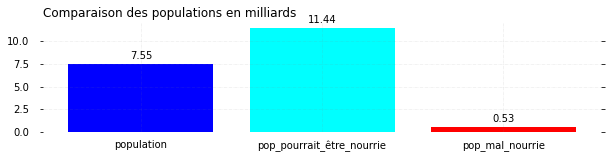

In [41]:
population = df1['Nature_pop'].head(12)
Nombre= df1['Nombre_pop'].head(12)
  
# La définition du graphique et sa taille totale
fig, ax = plt.subplots(figsize=(10, 2))
  
# Définition des valeurs et couleurs des barres horizontales(ax.barh) ou verticales(ax.bar) 
ax.bar(population, Nombre, color=['blue','cyan','red'])
  
# Supprimer les les lignes des contrours du graphique
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  

ax.xaxis.set_ticks_position('none')#indique l'endroit du nom de chaque barre
ax.yaxis.set_ticks_position('both')#l'endroit des où mettre l'indicateur de chaque ligne horizontale
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)

   
# Add annotation to bars
for bar in ax.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Add Plot Title
ax.set_title('Comparaison des populations en milliards',
             loc='left', )
 
plt.show()

#### conclusion

#### Malgré la disponibilité alimentaire mondiale qui peut couvrir jusqu'à 156% de la population,
#### il y a 7.11% de la population en sous nutrition en 2017

# Question 3) le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité des produits végétaux

In [42]:
dispo= pd.read_csv('dispo_alimentaire.csv')

In [43]:
#Filtrer l'origine végétale pour afficher seulement la catégorie vegetale dans la colonne Origine 
dispo ['dispo_végétale']= (dispo ['Origine']=='vegetale')

In [44]:
# Table pivot pour mettre l'origine en fonction de la zone tout en séparant l'origine animale de l'origine vegetale
origine_zone=pd.pivot_table (dispo , index='Zone', values='Disponibilité alimentaire (Kcal/personne/jour)',columns='Origine', aggfunc="sum",
                                margins = True,fill_value=0)
origine_zone

Origine,animale,vegetale,All
Zone,,,
Afghanistan,216,1871,2087.0
Afrique du Sud,487,2533,3020.0
Albanie,985,2203,3188.0
Algérie,378,2915,3293.0
Allemagne,1042,2461,3503.0
...,...,...,...
Équateur,614,1732,2346.0
États-Unis d'Amérique,984,2698,3682.0
Éthiopie,124,2005,2129.0


In [45]:
# Chercher l'index de la ligne dont la zone contient le mot Royaume pour corriger son orthographe 
Recherche_valeur = Population_2017[Population_2017['Zone'].str.contains('Royaume')]
Recherche_valeur.head()

,Zone,Année,Population
1114,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2017,66.727461


In [46]:
# Afficher la ligne dont l'index est 1114
Population_2017.loc[1114,'Zone']

"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"

In [170]:
# Mettre à jour la ligne 1114 avec une valeur identique à celle utilisée dans le tableau origine zone pour pouvoir faire un merge 
Population_2017.loc[1114,'Zone']="Royaume-Uni"

In [48]:
Population_2017.loc[1114,'Zone']

'Royaume-Uni'

In [49]:
Recherche_valeur = Population_2017[Population_2017['Zone'].str.contains('Tch')]
Recherche_valeur.head(2)

,Zone,Année,Population
1300,Tchad,2017,15.016753
1306,Tchéquie,2017,10.641034


In [50]:
Population_2017.loc[1306,'Zone']

'Tchéquie'

In [171]:
Population_2017.loc[1306,'Zone']="Tchéquie (la)"

In [52]:
Population_2017.loc[1306,'Zone']

'Tchéquie (la)'

In [53]:
# Tableau merge entre Disop_origine et Population_2017 avec inner pour pouvoir calculer la disponibilité végétale mondiale 
Dispo_Origine= pd.merge(origine_zone.reset_index(),Population_2017, on= ['Zone'], how= 'inner')
Dispo_Origine

,Zone,animale,vegetale,All,Année,Population
0,Afghanistan,216,1871,2087.0,2017,36.296113
1,Afrique du Sud,487,2533,3020.0,2017,57.009756
2,Albanie,985,2203,3188.0,2017,2.884169
3,Algérie,378,2915,3293.0,2017,41.389189
4,Allemagne,1042,2461,3503.0,2017,82.658409
...,...,...,...,...,...,...
169,Émirats arabes unis,557,2718,3275.0,2017,9.487203
170,Équateur,614,1732,2346.0,2017,16.785361
171,États-Unis d'Amérique,984,2698,3682.0,2017,325.084756
172,Éthiopie,124,2005,2129.0,2017,106.399924


In [54]:
# Supprimer colonne All 
del Dispo_Origine['All']

In [55]:
# Supprimer colonne animale 
del Dispo_Origine['animale']

In [56]:
# Affichage du tableau ou on trouve les colonnes essentielles pour notre calcul
Dispo_Origine

,Zone,vegetale,Année,Population
0,Afghanistan,1871,2017,36.296113
1,Afrique du Sud,2533,2017,57.009756
2,Albanie,2203,2017,2.884169
3,Algérie,2915,2017,41.389189
4,Allemagne,2461,2017,82.658409
...,...,...,...,...
169,Émirats arabes unis,2718,2017,9.487203
170,Équateur,1732,2017,16.785361
171,États-Unis d'Amérique,2698,2017,325.084756
172,Éthiopie,2005,2017,106.399924


In [57]:
# Mettre en ordre les colonnes 
Dispo_Origine = Dispo_Origine[['Zone','Année','vegetale','Population']]

In [173]:
# Utiliser .loc et .multiplay pour parcourir tout le tableau et calculer la disponibilité végétale totale en multipliant les colonnes Population et vegetale
Dispo_Origine.loc[:, 'disponibilité_végétale_totale']=Dispo_Origine["Population"].multiply(Dispo_Origine["vegetale"])
Dispo_Origine

C:\Users\ibenz\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Zone,Année,vegetale,Population,disponibilité_végétale_totale
0,Afghanistan,2017,1871,36.296113,67910.027423
1,Afrique du Sud,2017,2533,57.009756,144405.711948
2,Albanie,2017,2203,2.884169,6353.824307
3,Algérie,2017,2915,41.389189,120649.485935
4,Allemagne,2017,2461,82.658409,203422.344549
...,...,...,...,...,...
169,Émirats arabes unis,2017,2718,9.487203,25786.217754
170,Équateur,2017,1732,16.785361,29072.245252
171,États-Unis d'Amérique,2017,2698,325.084756,877078.671688
172,Éthiopie,2017,2005,106.399924,213331.847620


In [59]:
# Calculer la somme du nombre de la population totale en 2017 pour calculer le pourcentage après
Population_totale_2017 =Population_2017.Population.sum()/1000
Population_totale_2017
print( round (Population_totale_2017,2),'milliards de personnes')   

7.55 milliards de personnes


#### Réponse question 3) le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité des produits végétaux

In [60]:
# Le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité des produits végétaux
nb_theorique_personnes_nourris_végétal= ((Dispo_Origine["disponibilité_végétale_totale"].sum())/1828)/1000
nb_theorique_personnes_nourris_végétal
print(round (nb_theorique_personnes_nourris_végétal,2),'milliards de personnes')

9.55 milliards de personnes


In [61]:
# Préparer un tableau avec les colonnes nécessaires pour le graphique et l'analyse
# initialize list of lists
data2 = [['population', 7.55 ], ['pop_pourrait_être_nourrie_végétale', 9.55 ],['pop_mal_nourrie', 0.53 ]]
 
# Create the pandas DataFrame
df2 = pd.DataFrame(data2, columns = ['Nature_pop', 'Nombre_pop'])
 
# print dataframe.
df2

,Nature_pop,Nombre_pop
0,population,7.55
1,pop_pourrait_être_nourrie_végétale,9.55
2,pop_mal_nourrie,0.53


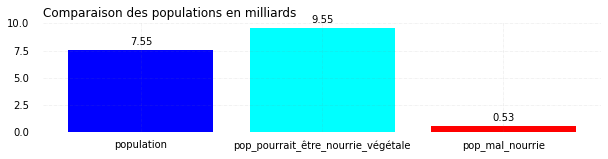

In [62]:
# Un graphique pour montrer comparaison des populations en milliards
population = df2['Nature_pop'].head(12)
Nombre= df2['Nombre_pop'].head(12)
  
# Figure Size
fig, ax = plt.subplots(figsize=(10, 2))
  
# Horizontal Bar Plot
ax.bar(population, Nombre, color=['blue','cyan','red'])
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)

   
# Add annotation to bars
for bar in ax.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Add Plot Title
ax.set_title('Comparaison des populations en milliards',
             loc='left', )
 
plt.show()

[source choix 1828 kcal](https://knoema.fr/FAOFSD2020/fao-food-security-data?tsId=1017640#:~:text=Minimum%20dietary%20energy%20requirement%20(MDER)%20of%20World%20increased%20from%201%2C806,average%20annual%20rate%20of%200.06%25.)

### Pourcentage du nombre de personnes qui pourraient être nourries à partir de la disponibilité des produits végétaux par rapport à la population totale 2017

In [63]:
# calculer le pourcentage des personnes qui pourraient être nourries à partir de la disponibilité des produits végétaux par rapport à la population totale 2017
prop_pers_nourries_végétal= (nb_theorique_personnes_nourris_végétal /Population_totale_2017)*100
print(round (prop_pers_nourries_végétal,2),'%')

126.46 %


### Conclusion

#### Les produits végéteaux, en plus d'etre très bénéfiques pour la santé , leur coût de production beaucoup moins onéreux que la consommation animale fait de ce type de consommation une très bonne solution pour les pays en sous-nutrition.
#### Uniquement avec les produits végétaux on peut nourrir 126,46% de la population mondiale si leur répartition est équitable.


In [64]:
# initialize list of lists
data = [['population', 7.29 ], ['pop_pourrait_être_nourrie',11.44 ], ['pop_pourrait_être_nourrie_végétale', 9.55 ],['pop_mal_nourrie', 0.53 ]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Nature_pop', 'Nombre_pop'])
 
# print dataframe.
df

,Nature_pop,Nombre_pop
0,population,7.29
1,pop_pourrait_être_nourrie,11.44
2,pop_pourrait_être_nourrie_végétale,9.55
3,pop_mal_nourrie,0.53


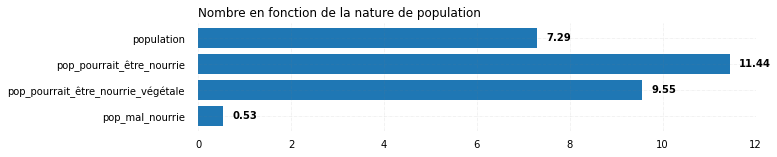

In [65]:
# Un graphique qui montre les personnes qui pourraient être nourries 
# ( par ou non des produits végéteaux ) et les comparer avec la population totale 
#et la population mal-nourrie
population = df['Nature_pop'].head(12)
Nombre= df['Nombre_pop'].head(12)
  
# Figure Size
fig, ax = plt.subplots(figsize=(10, 2))
  
# Horizontal Bar Plot
ax.barh(population, Nombre)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')
  
# Add Plot Title
ax.set_title('Nombre en fonction de la nature de population',
             loc='left', )
  
plt.show()

# Question 4) Calcul des parts à partir de la disponibilité intérieure qui est égale à: nourriture + alimentation animaux + pertes + semences + transformation + autre utilisation)

In [66]:
dispo= pd.read_csv('dispo_alimentaire.csv')

In [67]:
# Remplacer les NAN par 0 pour pouvoir faire le calcul après 
dispo['Aliments pour animaux']=dispo['Aliments pour animaux'].replace(np.nan, 0)
dispo['Autres Utilisations']=dispo['Autres Utilisations'].replace(np.nan, 0)
dispo['Disponibilité intérieure']=dispo['Disponibilité intérieure'].replace(np.nan, 0)
dispo['Exportations - Quantité']=dispo['Exportations - Quantité'].replace(np.nan, 0)
dispo['Importations - Quantité']=dispo['Importations - Quantité'].replace(np.nan, 0)
dispo['Nourriture']=dispo['Nourriture'].replace(np.nan, 0)
dispo['Pertes']=dispo['Pertes'].replace(np.nan, 0)
dispo['Production']=dispo['Production'].replace(np.nan, 0)
dispo['Semences']=dispo['Semences'].replace(np.nan, 0)
dispo['Traitement']=dispo['Traitement'].replace(np.nan, 0)
dispo['Variation de stock']=dispo['Variation de stock'].replace(np.nan, 0)


In [68]:
# Calcul de la diponibilité intériuere en utilisant la fonctions df [''].sum
total_dispo_int_a =(dispo['Semences'].sum() + dispo['Nourriture'].sum() + dispo['Pertes'].sum() + dispo['Traitement'].sum() + dispo['Autres Utilisations'].sum() + dispo['Aliments pour animaux'].sum())
print(round(total_dispo_int_a),'milliers de tonnes')

9858592 milliers de tonnes


In [176]:
dispo.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


## a) la part qui est attribuée à l’alimentation animale

In [177]:
# somme de la disponibilité des aliments pour animaux 
total_alimentation_animal= dispo["Aliments pour animaux"].sum()
print(round (total_alimentation_animal),'milliers de tonnes')

1304245 milliers de tonnes


In [178]:
#Calculer la part qui est attribuée à l'alimentation animale
part_animal_a= ( total_alimentation_animal/total_dispo_int_a)*100
print(round (part_animal_a,2),'%')

13.23 %


## b) La part qui est perdue

In [179]:
# Somme de la perte totale 
total_perte= dispo ["Pertes"].sum()
print(round (total_perte),'milliers de tonnes')

453698 milliers de tonnes


In [180]:
#Calculer la part qui est attribuée à la part perdue 
part_perte_a= (total_perte/total_dispo_int_a)*100
print(round (part_perte_a,2),'%')

4.6 %


## c) la part qui est concrètement utilisée pour l'alimentation humaine

In [181]:
# Somme de nourritre qui est utilisée pour l'alimentation humaine
total_nourriture= dispo ["Nourriture"].sum()
print(round (total_nourriture),'milliers de tonnes')

4876258 milliers de tonnes


In [182]:
#Calculer la part qui est attribuée à l'alimentation humaine
part_humaine_a= (total_nourriture/total_dispo_int_a)*100
print(round(part_humaine_a,2),'%')

49.46 %


## d) la part qui est concrètement utilisée pour traitements

In [183]:
# somme des traitements
total_traitements= dispo["Traitement"].sum()
print(round (total_traitements),'milliers de tonnes')

2204687 milliers de tonnes


In [184]:
#Calculer la part qui est attribuée aux traitements
part_traitements_a= (total_traitements/total_dispo_int_a)*100
print(round(part_traitements_a,2),'%')

22.36 %


## e) la part qui est concrètement utilisée pour les semences

In [185]:
# Somme de nourritre qui est utilisée pour l'alimentation humaine
total_semences= dispo ["Semences"].sum()
print(round (total_semences),'milliers de tonnes')

154681 milliers de tonnes


In [186]:
#Calculer la part qui est attribuée aux semences
part_semences_a= (total_semences/total_dispo_int_a)*100
print(round(part_semences_a,2),'%')

1.57 %


## f) la part qui est concrètement utilisée pour les autres utilisations

In [187]:
# Somme de nourritre qui est utilisée pour l'alimentation humaine
total_autres= dispo ["Autres Utilisations"].sum()
print(round (total_autres),'milliers de tonnes')

865023 milliers de tonnes


In [188]:
#Calculer la part qui est attribuée pour les autres utilisations
part_autres_a= (total_autres/total_dispo_int_a)*100
print(round(part_autres_a,2),'%')

8.77 %


### g) Graphique en Camembert 

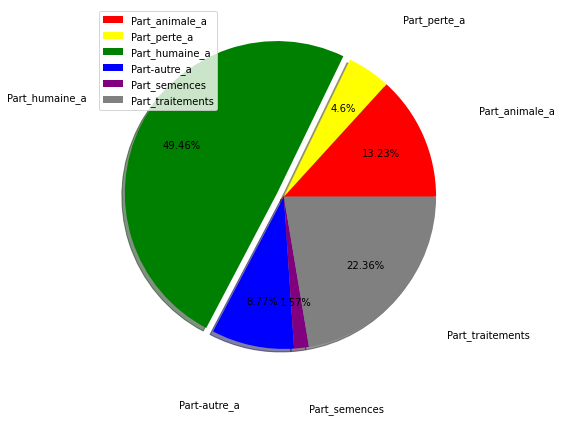

In [75]:
plt.figure(figsize = (10, 7))
dispo = [13.23, 4.60, 49.46,8.77,1.57,22.36] 
plt.pie(dispo, labels = ['Part_animale_a', 'Part_perte_a', 'Part_humaine_a','Part-autre_a','Part_semences','Part_traitements'],
           colors = ['red', 'yellow', 'green','blue','purple','grey'],
           explode = [0, 0, 0.05, 0,0,0],
           autopct = lambda dispo: str(round(dispo, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.legend()

# Demandes de Mélanie 

## A) Les pays pour lequels la proportion de personnes sous-alimentées est plus forte en 2017

In [76]:
# Mise à jour de la dataframe pop avec les modifications sur la colonne valeur et l'unité de la colonne population
pop=pd.read_csv('population.csv')
pop = pop. rename(columns={'Valeur':'Population'})
pop['Population'] =  pop['Population'].astype(float)/1000

In [77]:
# Filter l'année 2017 dans le tabelau sous_nut_2017
sous_nut_2017 = sous_nut [sous_nut['Année'] == 2017 ]

In [78]:
# Affichage du tableau Popoulation_2017 
Population_année= pop.groupby("Année")
Population_2017= Population_année.get_group(2017)
Population_2017.head(2)

,Zone,Année,Population
4,Afghanistan,2017,36.296113
10,Afrique du Sud,2017,57.009756


In [79]:
# Fusionner les deux tableaux sous_nut_2017 et Population_2017 par la fonction merge et inner pour la jointure
sous_pop_2017= pd.merge(sous_nut_2017.reset_index(),Population_2017, on= ['Zone'], how= 'inner')
sous_pop_2017

,index,Zone,Année_x,Nombre_en_million_en_sous_nutrition,Année_y,Population
0,4,Afghanistan,2017,10.5,2017,36.296113
1,10,Afrique du Sud,2017,3.1,2017,57.009756
2,16,Albanie,2017,0.1,2017,2.884169
3,22,Algérie,2017,1.3,2017,41.389189
4,28,Allemagne,2017,NaN,2017,82.658409
...,...,...,...,...,...,...
198,1192,Venezuela (République bolivarienne du),2017,8.0,2017,29.402484
199,1198,Viet Nam,2017,6.5,2017,94.600648
200,1204,Yémen,2017,NaN,2017,27.834819
201,1210,Zambie,2017,NaN,2017,16.853599


In [80]:
# utiliser iloc pour afficher les colonnes nécessaire pour le calcul de la proportion des personnes sous-alimentées 
Zone_2017=sous_pop_2017.iloc [0:203,[1,3,5]]
Zone_2017

,Zone,Nombre_en_million_en_sous_nutrition,Population
0,Afghanistan,10.5,36.296113
1,Afrique du Sud,3.1,57.009756
2,Albanie,0.1,2.884169
3,Algérie,1.3,41.389189
4,Allemagne,NaN,82.658409
...,...,...,...
198,Venezuela (République bolivarienne du),8.0,29.402484
199,Viet Nam,6.5,94.600648
200,Yémen,NaN,27.834819
201,Zambie,NaN,16.853599


In [81]:
# remplacer les NAN par O
Zone_2017 = Zone_2017.fillna(0)

In [82]:
#la proportion des personnes sous-alimentées en 2017
Zone_2017 ['proportion_pers_sous_alimentées_2017']= (Zone_2017 ['Nombre_en_million_en_sous_nutrition'] / Zone_2017 ['Population'])*100
Zone_2017

,Zone,Nombre_en_million_en_sous_nutrition,Population,proportion_pers_sous_alimentées_2017
0,Afghanistan,10.5,36.296113,28.928718
1,Afrique du Sud,3.1,57.009756,5.437666
2,Albanie,0.1,2.884169,3.467203
3,Algérie,1.3,41.389189,3.140917
4,Allemagne,0.0,82.658409,0.000000
...,...,...,...,...
198,Venezuela (République bolivarienne du),8.0,29.402484,27.208586
199,Viet Nam,6.5,94.600648,6.870989
200,Yémen,0.0,27.834819,0.000000
201,Zambie,0.0,16.853599,0.000000


#### Réponse question A) Les pays pour lequels la proportion de personnes sous-alimentées est plus forte en 2017

In [83]:
# Utiliser sort_values, ascending pour montrer les pays pour lequels
#la proportion de personnes sous-alimentées est plus forte en 2017
Zone_2017=Zone_2017.sort_values(by='proportion_pers_sous_alimentées_2017', ascending=False)

In [84]:
Zone_2017.head(10)

,Zone,Nombre_en_million_en_sous_nutrition,Population,proportion_pers_sous_alimentées_2017
51,Dominique,0.05,0.071458,69.971172
78,Haïti,5.30,10.982366,48.259182
157,République populaire démocratique de Corée,12.00,25.429825,47.188685
164,Saint-Vincent-et-les Grenadines,0.05,0.109827,45.526146
98,Kiribati,0.05,0.114158,43.798945
108,Madagascar,10.50,25.570512,41.062924
103,Libéria,1.80,4.702226,38.279742
100,Lesotho,0.80,2.091534,38.249438
183,Tchad,5.70,15.016753,37.957606
161,Rwanda,4.20,11.980961,35.055619


#### Un graphique qui présente l'ordre décroissant des dix pays en  sous nutrition en 2017 

In [85]:
Zone_2017_graph= Zone_2017[['Zone', 'proportion_pers_sous_alimentées_2017']]

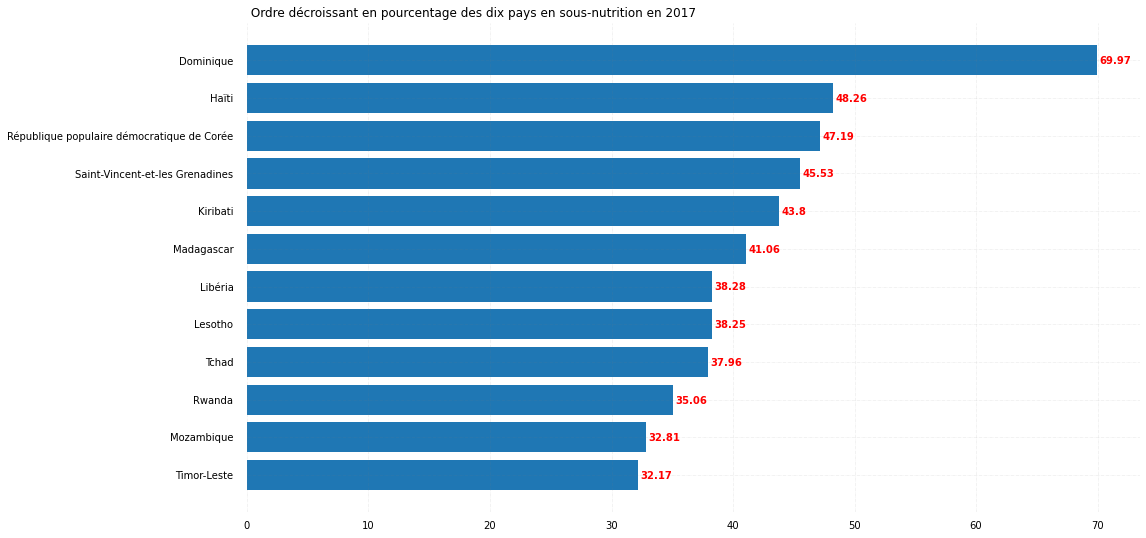

In [86]:
Zone = Zone_2017_graph['Zone'].head(12)
Proportion = Zone_2017_graph['proportion_pers_sous_alimentées_2017'].head(12)
  
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))
  
# Horizontal Bar Plot
ax.barh(Zone, Proportion)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='red')
  
# Add Plot Title
ax.set_title(' Ordre décroissant en pourcentage des dix pays en sous-nutrition en 2017',
             loc='left', )
  

plt.show()

## B) Les pays qui ont le plus bénéficié d’aide depuis 2013

In [87]:
aide= pd.read_csv('aide_alimentaire.csv')

In [88]:
# Renommer la colonne Valeur par Valeur_aide
aide = aide. rename(columns={'Valeur':'Valeur_aide'})

In [89]:
# Filtrer les années >= 2013
aide_a_partir_de_2013= aide [ aide ['Année'] >= 2013]
aide_a_partir_de_2013

,Pays bénéficiaire,Année,Produit,Valeur_aide
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [90]:
#Utiliser groupby .sum() pour calculer la somme dans colonne Valeur_aide en fonction des pays à partir de 2013
aide_par_zone_a_partir_de_2013 = aide_a_partir_de_2013.groupby(['Pays bénéficiaire'])['Valeur_aide'].sum()

In [91]:
aide_par_zone_a_partir_de_2013=aide_par_zone_a_partir_de_2013.to_frame()
aide_par_zone_a_partir_de_2013

,Valeur_aide
Pays bénéficiaire,
Afghanistan,185452
Algérie,81114
Angola,5014
Bangladesh,348188
Bhoutan,2666
...,...
Zambie,3026
Zimbabwe,62570
Égypte,1122


In [92]:
# réenitialiser l'index 
aide_par_zone_a_partir_de_2013.reset_index()
aide_par_zone_a_partir_de_2013=aide_par_zone_a_partir_de_2013.reset_index()

####  Réponse question B) Les pays qui ont le plus bénéficié d’aide depuis 2013

In [93]:
# Utiliser sort_values by ascending pour mettre en ordre descendant les pays qui ont le plus bénéficié d’aides depuis 2013
aide_par_zone_a_partir_de_2013= aide_par_zone_a_partir_de_2013.sort_values (by='Valeur_aide', ascending=False)
aide_par_zone_a_partir_de_2013.head(10)

,Pays bénéficiaire,Valeur_aide
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


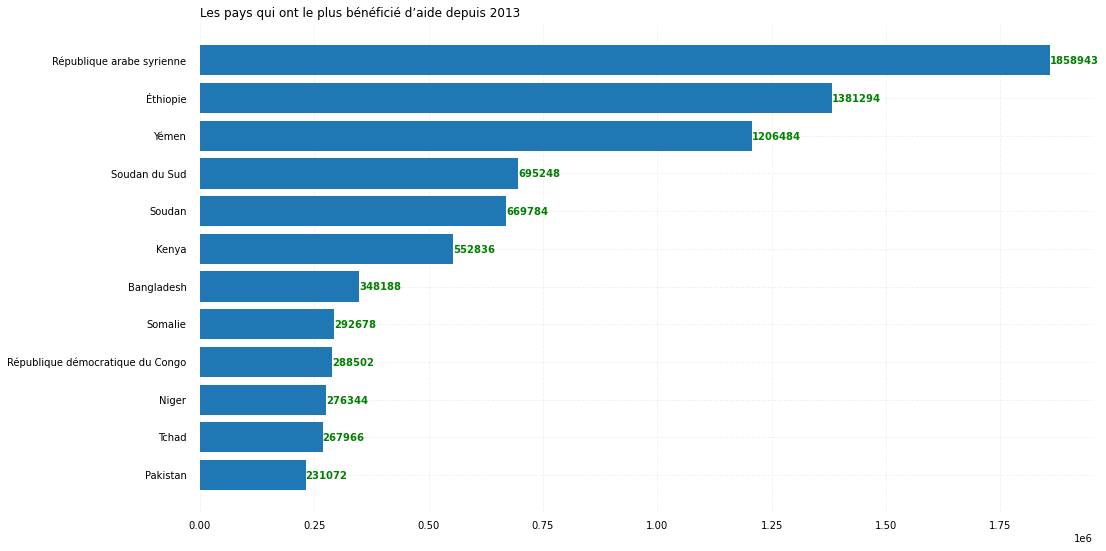

In [94]:
# un Graphique en histogramme pour tirer des conclusions
pays = aide_par_zone_a_partir_de_2013['Pays bénéficiaire'].head(12)
valeur = aide_par_zone_a_partir_de_2013['Valeur_aide'].head(12)
  
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))
  
# Horizontal Bar Plot
ax.barh(pays, valeur)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='green')
  
# Add Plot Title
ax.set_title('Les pays qui ont le plus bénéficié d’aide depuis 2013',
             loc='left', )
plt.show()

####  Mise en évidence de entre le montant de l'aide et la proportion de personnes sous-alimentées

In [95]:
# Renommer la colonne pays bénéficiaire par zone pour pouvoir merger on zone après
aide_a_partir_de_2013 =aide_a_partir_de_2013.rename(columns={'Pays bénéficiaire':'Zone'})

In [96]:
# Créer une variable aide à partir de 2013 par pays ôu on renommer la colonne par zone 
aide_a_partir_de_2013_par_pays=aide_a_partir_de_2013.groupby(['Zone']) ['Valeur_aide'].sum()

In [97]:
# réenitialiser l'index
aide_a_partir_de_2013_par_pays_reset= aide_a_partir_de_2013_par_pays.reset_index(drop=True)
aide_a_partir_de_2013_par_pays_reset

0      185452
1       81114
2        5014
3      348188
4        2666
       ...   
71       3026
72      62570
73       1122
74       1362
75    1381294
Name: Valeur_aide, Length: 76, dtype: int64

In [98]:
# mise à jour du type de la colonne Année pour pouvoir l'utiliser en numeric
sous_nut["Année"]= pd.to_numeric ( sous_nut["Année"])

In [99]:
# filtrer les année dans la data sous nutrition à partir de 2013
sous_nut_a_partir_de_2013= sous_nut [ sous_nut ['Année'] >= 2013]

In [100]:
# renommer la colonne Nombre en million par Nombre en million sous nut 
sous_nut_a_partir_de_2013 = sous_nut_a_partir_de_2013. rename(columns={'Nombre_en_million':'Nombre_en_million_sous_nut'})

In [101]:
# merge entre sous nut et population à partir de 2013
sous_nut_population_2013= pd.merge(sous_nut_a_partir_de_2013.reset_index(drop=True),pop, on= ['Zone','Année'], how= 'inner')

In [102]:
# ajouter une colonne pour calculer la proportion entre la population en sous nutrition et la population à partir de 2013
sous_nut_population_2013["prop_sous_nut_pop_%"]= sous_nut_population_2013["Nombre_en_million_en_sous_nutrition"] / sous_nut_population_2013["Population"]*100

In [103]:
# merge entre sous nut population  et aide à partir de 2013 on zone by inner
sous_nut_population_aide=pd.merge(sous_nut_population_2013,aide_a_partir_de_2013_par_pays,on= ['Zone'], how= 'inner')

In [104]:
# changer en unité 
sous_nut_population_aide["Population"]=sous_nut_population_aide["Population"]*1000000

In [105]:
# changer en unité
sous_nut_population_aide["Valeur_aide"]= sous_nut_population_aide["Valeur_aide"]*1000

In [106]:
# Calculer valeur aide par habitant
sous_nut_population_aide["Valeur_aide_par_habitant"]= round(sous_nut_population_aide["Valeur_aide"]/sous_nut_population_aide["Population"],2)
sous_nut_population_aide

,Zone,Année,Nombre_en_million_en_sous_nutrition,Population,prop_sous_nut_pop_%,Valeur_aide,Valeur_aide_par_habitant
0,Afghanistan,2013,8.6,32269589.0,26.650479,185452000,5.75
1,Afghanistan,2014,8.8,33370794.0,26.370364,185452000,5.56
2,Afghanistan,2015,8.9,34413603.0,25.861866,185452000,5.39
3,Afghanistan,2016,9.7,35383032.0,27.414270,185452000,5.24
4,Afghanistan,2017,10.5,36296113.0,28.928718,185452000,5.11
...,...,...,...,...,...,...,...
445,Zimbabwe,2014,NaN,13586707.0,NaN,62570000,4.61
446,Zimbabwe,2015,NaN,13814629.0,NaN,62570000,4.53
447,Zimbabwe,2016,NaN,14030331.0,NaN,62570000,4.46
448,Zimbabwe,2017,NaN,14236595.0,NaN,62570000,4.40


In [107]:
del sous_nut_population_aide['Nombre_en_million_en_sous_nutrition']

In [108]:
del sous_nut_population_aide['Population']

In [109]:
# utiliser groupby .mean pour calculer les moyennes dans chaque colonne
sous_nut_population_aide_group = sous_nut_population_aide.groupby (['Zone']).agg({'prop_sous_nut_pop_%':'mean','Valeur_aide_par_habitant':'mean','Valeur_aide':'mean'}).reset_index()
sous_nut_population_aide_group

,Zone,prop_sous_nut_pop_%,Valeur_aide_par_habitant,Valeur_aide
0,Afghanistan,27.514491,5.340000,1.854520e+08
1,Algérie,3.201502,2.021667,8.111400e+07
2,Angola,21.433540,0.176667,5.014000e+06
3,Bangladesh,14.024052,2.216667,3.481880e+08
4,Bhoutan,NaN,3.641667,2.666000e+06
...,...,...,...,...
70,Zambie,NaN,0.186667,3.026000e+06
71,Zimbabwe,NaN,4.503333,6.257000e+07
72,Égypte,4.747290,0.010000,1.122000e+06
73,Équateur,10.333543,0.083333,1.362000e+06


In [110]:
sous_nut_population_aide_group.dropna()

,Zone,prop_sous_nut_pop_%,Valeur_aide_par_habitant,Valeur_aide
0,Afghanistan,27.514491,5.340000,1.854520e+08
1,Algérie,3.201502,2.021667,8.111400e+07
2,Angola,21.433540,0.176667,5.014000e+06
3,Bangladesh,14.024052,2.216667,3.481880e+08
5,Bolivie (État plurinational de),16.621647,0.000000,6.000000e+03
6,Burkina Faso,18.280697,3.535000,6.481200e+07
8,Bénin,7.470030,2.075000,2.222400e+07
9,Cambodge,14.913113,1.651667,2.578000e+07
10,Cameroun,6.636709,2.183333,5.147800e+07
12,Colombie,6.486627,0.683333,3.274600e+07


In [111]:
import numpy as np
import matplotlib.pyplot as plt

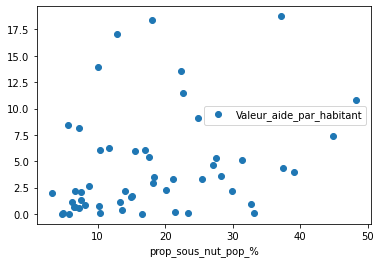

In [112]:
# un graphique en nuage de points pour visualiser l'aide en fonction de la sous nutrition
sous_nut_population_aide_group.plot(x='prop_sous_nut_pop_%', y='Valeur_aide_par_habitant', style='o')

plt.savefig("pandas_scatter_plot_01.png", bbox_inches='tight', dpi=100)

In [113]:
# Utiliser Sort.values pour un ordre décroissant des pays qui ont les plus grandes valeur d'aide par habitant
sous_nut_population_aide_group=sous_nut_population_aide_group.sort_values(by='Valeur_aide_par_habitant', ascending=False)

In [114]:
# Utiliser Sort.values pour un ordre croissant des pays qui ont les plus petites valeur d'aide par habitant
sous_nut_population_aide_group=sous_nut_population_aide_group.sort_values(by='Valeur_aide_par_habitant', ascending=True)

In [115]:
sous_nut_population_aide_group.describe()

,prop_sous_nut_pop_%,Valeur_aide_par_habitant,Valeur_aide
count,53.000000,75.000000,7.500000e+01
mean,17.976470,8.478756,1.469383e+08
std,11.179228,15.835613,3.127039e+08
min,3.201502,0.000000,6.000000e+03
25%,8.195979,1.048333,9.581000e+06
50%,15.467102,3.581667,4.129600e+07
75%,24.847939,8.317500,1.158910e+08
max,48.306924,103.743333,1.858943e+09


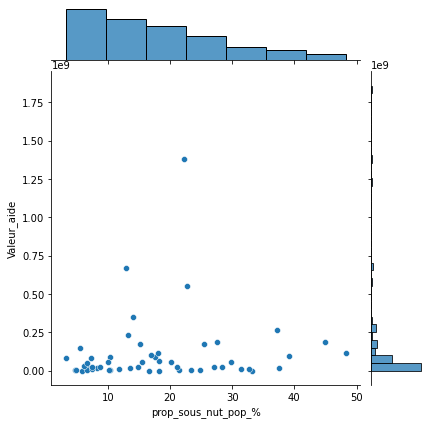

In [116]:
import seaborn as sns
sns.jointplot(x=sous_nut_population_aide_group["prop_sous_nut_pop_%"], y=sous_nut_population_aide_group["Valeur_aide"], kind='scatter')
plt.show()

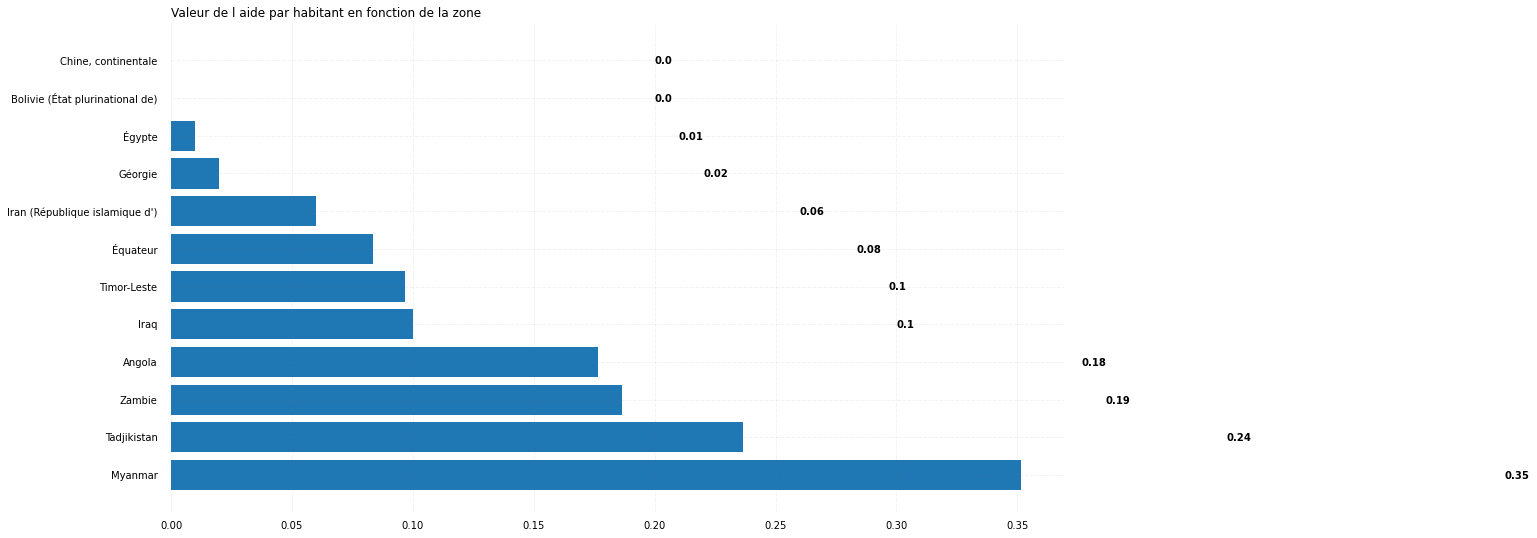

In [117]:

Zone = sous_nut_population_aide_group['Zone'].head(12)
aide= sous_nut_population_aide_group['Valeur_aide_par_habitant'].head(12)
  
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))
  
# Horizontal Bar Plot
ax.barh(Zone, aide)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')
  
# Add Plot Title
ax.set_title('Valeur de l aide par habitant en fonction de la zone',
             loc='left', )
  

plt.show()

In [118]:
 # classer par ordre décroissant les zones avec la proportion de la sous nutrition
sous_nut_population_aide_group=sous_nut_population_aide_group.sort_values(by='prop_sous_nut_pop_%',ascending=False)
sous_nut_population_aide_group.reset_index()

,index,Zone,prop_sous_nut_pop_%,Valeur_aide_par_habitant,Valeur_aide
0,25,Haïti,48.306924,10.823333,1.164500e+08
1,55,République populaire démocratique de Corée,44.944119,7.426667,1.874120e+08
2,36,Madagascar,39.054761,3.940000,9.667800e+07
3,35,Libéria,37.482829,4.388333,1.984600e+07
4,65,Tchad,37.142824,18.736667,2.679660e+08
...,...,...,...,...,...
70,47,Palestine,NaN,37.028333,1.696840e+08
71,17,Djibouti,NaN,44.855000,4.129600e+07
72,69,Yémen,NaN,45.051667,1.206484e+09
73,61,Soudan du Sud,NaN,64.855000,6.952480e+08


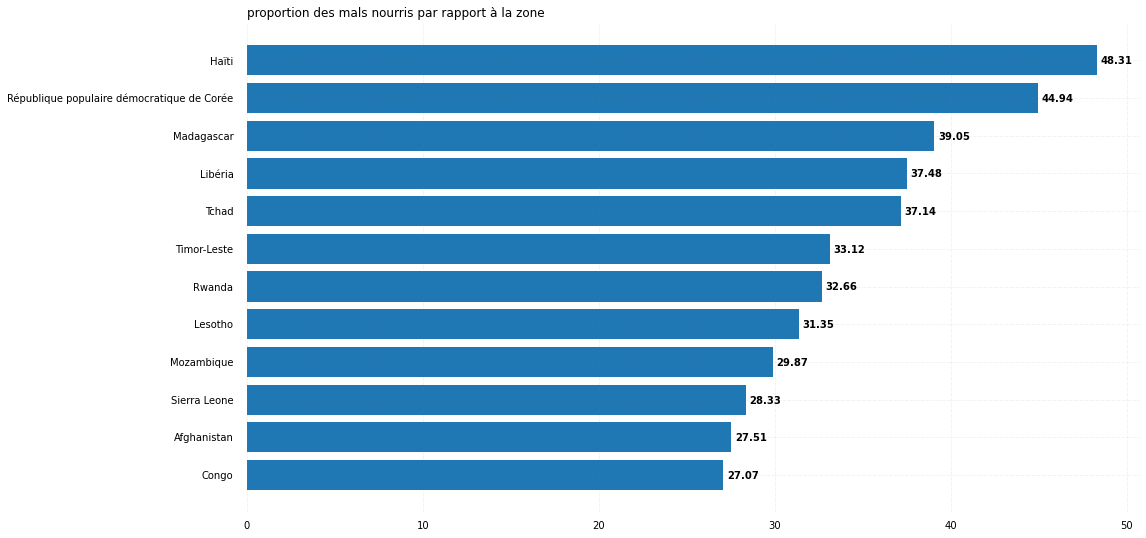

In [119]:

Zone = sous_nut_population_aide_group['Zone'].head(12)
mal_nourrie= sous_nut_population_aide_group['prop_sous_nut_pop_%'].head(12)
  
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))
  
# Horizontal Bar Plot
ax.barh(Zone, mal_nourrie)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')
  
# Add Plot Title
ax.set_title('proportion des mals nourris par rapport à la zone',
             loc='left', )

plt.show()

## C) les pays ayants le plus/le moins de disponibilité/habitant

In [120]:
dispo= pd.read_csv('dispo_alimentaire.csv')

In [121]:
# groupby pour calculer la somme de disponibilité alimentaire (Kcal/personne/jour) en fonction des zones
disponibilité_par_zone = dispo.groupby (['Zone']) ['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

In [122]:
disponibilité_par_zone=disponibilité_par_zone.to_frame()

#### Réponse question C) les pays ayants le plus/le moins de disponibilité/habitant

In [123]:
disponibilité_par_zone=disponibilité_par_zone.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False)
disponibilité_par_zone.reset_index()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3708.0
3,États-Unis d'Amérique,3682.0
4,Israël,3610.0
...,...,...
169,Haïti,2089.0
170,Afghanistan,2087.0
171,Madagascar,2056.0
172,Zambie,1924.0


In [124]:
disponibilité_par_zone=disponibilité_par_zone.reset_index()

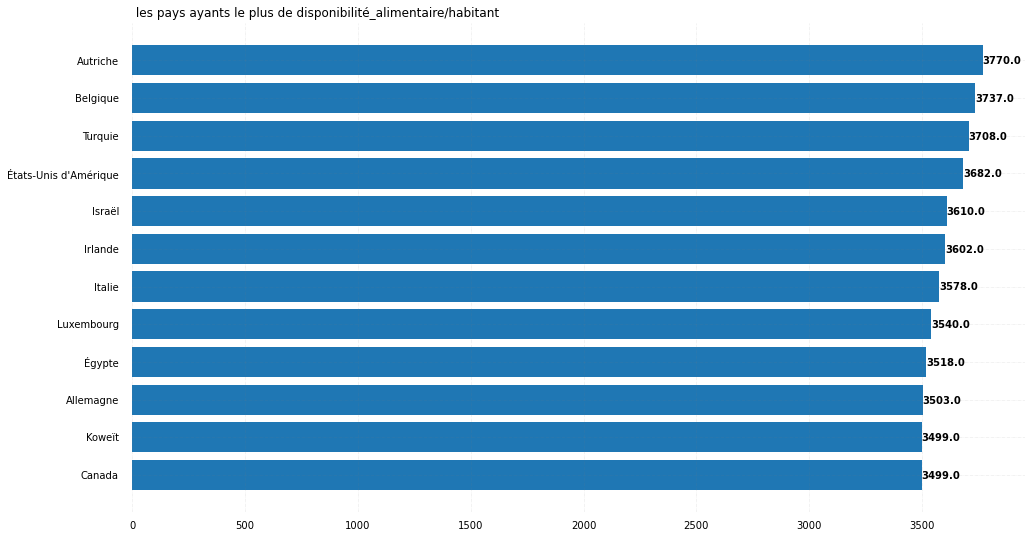

In [125]:
Zone = disponibilité_par_zone['Zone'].head(12)
Disponibilité= disponibilité_par_zone['Disponibilité alimentaire (Kcal/personne/jour)'].head(12)
  
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))
  
# Horizontal Bar Plot
ax.barh(Zone, Disponibilité)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')
  
# Add Plot Title
ax.set_title(' les pays ayants le plus de disponibilité_alimentaire/habitant',
             loc='left', )
  

plt.show()

In [126]:
disponibilité_par_zone=disponibilité_par_zone.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True)
disponibilité_par_zone.reset_index()

,index,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,173,République centrafricaine,1879.0
1,172,Zambie,1924.0
2,171,Madagascar,2056.0
3,170,Afghanistan,2087.0
4,169,Haïti,2089.0
...,...,...,...
169,4,Israël,3610.0
170,3,États-Unis d'Amérique,3682.0
171,2,Turquie,3708.0
172,1,Belgique,3737.0


In [127]:
disponibilité_par_zone=disponibilité_par_zone.reset_index()

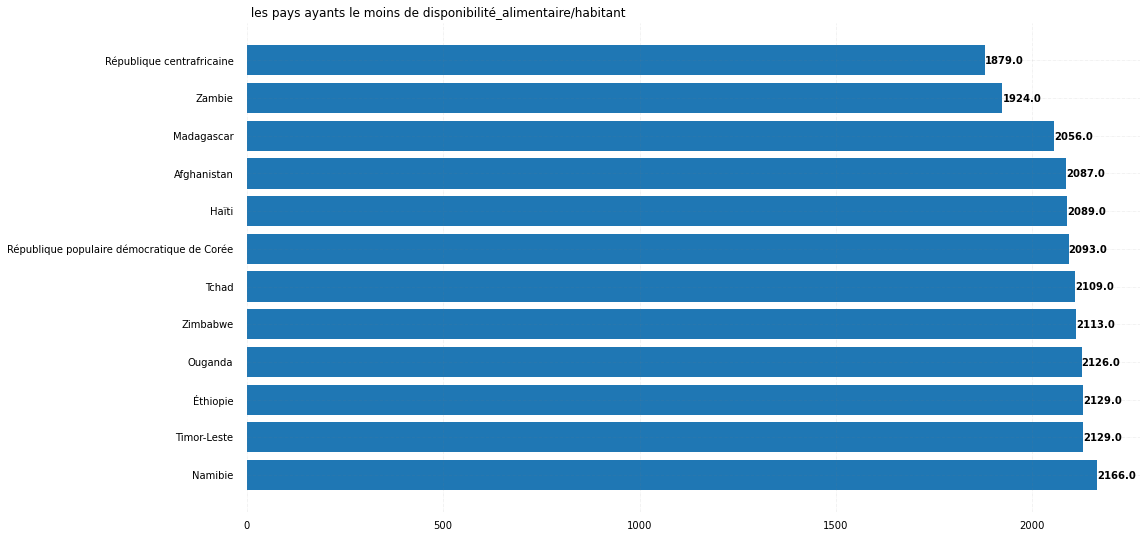

In [128]:
Zone = disponibilité_par_zone['Zone'].head(12)
Disponibilité= disponibilité_par_zone['Disponibilité alimentaire (Kcal/personne/jour)'].head(12)
  
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))
  
# Horizontal Bar Plot
ax.barh(Zone, Disponibilité)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')
  
# Add Plot Title
ax.set_title(' les pays ayants le moins de disponibilité_alimentaire/habitant',
             loc='left', )
  

plt.show()

# D) Analyse supplémentaires des pays en difficulté

### Proportion des exports par rapport à la production.

In [129]:
# mise à jour de la dataframe dispo
dispo= pd.read_csv('dispo_alimentaire.csv')

In [130]:
# selectionner les colonnes nécessaires pour le calcul après
colonnes_selectionnees = dispo[["Zone","Produit","Production","Exportations - Quantité","Importations - Quantité","Variation de stock"]].copy()
pd_production_export = colonnes_selectionnees.copy()
# supprimer les  NAN 
pd_production_export=pd_production_export.dropna()

In [131]:
pd_production_export = pd_production_export.groupby (['Zone']).agg({'Production':'sum','Exportations - Quantité':'sum','Importations - Quantité':'sum','Variation de stock':'sum'}).reset_index()

In [132]:
pd_production_export['prop_exp_prod']=round((pd_production_export ['Exportations - Quantité'] / pd_production_export ['Production'])*100,2)

In [133]:
# utiliser l'équation:production+importation-exportation+variationde stock pour calculer la disponibilité intérieure
pd_production_export['disponibilité_intérieure_calculée']=round((pd_production_export ['Production']+ pd_production_export ['Importations - Quantité']-pd_production_export ['Exportations - Quantité']+pd_production_export ['Variation de stock']),2)

In [134]:
# utiliser merge pour fusionner les deux datas zone_2017 et pd_production_export
Analyse_sous_nutrition= pd.merge(Zone_2017,pd_production_export, on= ['Zone'], how= 'inner')

In [135]:
# séléctionner les colonnes nécéssaires pour l'analyse 
colonnes_selectionnees_analyse = Analyse_sous_nutrition[["Zone","proportion_pers_sous_alimentées_2017","prop_exp_prod","disponibilité_intérieure_calculée"]].copy()
colonnes_selectionnees_analyse
# sort values pour un ordre décroissant des 10 pays qui ont le plus de personnes sous alimentées
colonnes_selectionnees_analyse=colonnes_selectionnees_analyse.sort_values(by='proportion_pers_sous_alimentées_2017', ascending=False)
colonnes_selectionnees_analyse.head(10)

,Zone,proportion_pers_sous_alimentées_2017,prop_exp_prod,disponibilité_intérieure_calculée
0,Dominique,69.971172,4.00,31.0
1,Haïti,48.259182,1.84,1279.0
2,République populaire démocratique de Corée,47.188685,0.00,4270.0
3,Saint-Vincent-et-les Grenadines,45.526146,18.97,88.0
4,Kiribati,43.798945,1.18,158.0
5,Madagascar,41.062924,2.80,8466.0
6,Libéria,38.279742,6.22,551.0
7,Lesotho,38.249438,20.65,587.0
8,Tchad,37.957606,0.00,2035.0
9,Rwanda,35.055619,1.58,9450.0


### Proportion des pertes par rapport à la disponibilité intérieure

In [136]:
# selectionner les colonnes nécessaires pour le calcul après
colonnes_selectionnees2 = dispo[["Zone","Produit","Pertes","Disponibilité intérieure"]].copy()
pd_Pertes_Disponibilité_intérieure = colonnes_selectionnees2.copy()
# supprimer les NAN 
pd_Pertes_Disponibilité_intérieure=pd_Pertes_Disponibilité_intérieure.dropna()

In [137]:
# utiliser groupby .agg : sum pour calculer la somme dans les colonnes nécéssaires pour calculer la proportion après
pd_Pertes_Disponibilité_intérieure = pd_Pertes_Disponibilité_intérieure.groupby (['Zone']).agg({'Pertes':'sum','Disponibilité intérieure':'sum'}).reset_index()

In [138]:
# Calculer la proportion entre la perte et la disponibilité intérieure dans la colonne ajoutée
pd_Pertes_Disponibilité_intérieure['prop_perte_dispo']=round((pd_Pertes_Disponibilité_intérieure ['Pertes'] / pd_Pertes_Disponibilité_intérieure ['Disponibilité intérieure'])*100,2)
pd_Pertes_Disponibilité_intérieure
# utiliser sort values pour un ordre décroissant des pays qui ont le plus de perte par rapport à la disponibilité intérieure
pd_Pertes_Disponibilité_intérieure=pd_Pertes_Disponibilité_intérieure.sort_values(by='prop_perte_dispo', ascending=False)
pd_Pertes_Disponibilité_intérieure

,Zone,Pertes,Disponibilité intérieure,prop_perte_dispo
141,Sierra Leone,2191.0,5831.0,37.58
57,Ghana,7442.0,35757.0,20.81
46,Dominique,20.0,112.0,17.86
55,Gabon,223.0,1306.0,17.08
5,Angola,4799.0,28394.0,16.90
...,...,...,...,...
82,Kiribati,0.0,24.0,0.00
18,Bermudes,0.0,5.0,0.00
73,Islande,0.0,62.0,0.00
135,Saint-Kitts-et-Nevis,0.0,12.0,0.00


In [139]:
# utiliser merge pour fusionner les deux datas zone_2017 et pd_Pertes_Disponibilité_intérieure
Analyse_perte_sous_nurition= pd.merge(Zone_2017,pd_Pertes_Disponibilité_intérieure, on= ['Zone'], how= 'inner')
Analyse_perte_sous_nurition

,Zone,Nombre_en_million_en_sous_nutrition,Population,proportion_pers_sous_alimentées_2017,Pertes,Disponibilité intérieure,prop_perte_dispo
0,Dominique,0.05,0.071458,69.971172,20.0,112.0,17.86
1,Haïti,5.30,10.982366,48.259182,679.0,5442.0,12.48
2,République populaire démocratique de Corée,12.00,25.429825,47.188685,1066.0,13344.0,7.99
3,Saint-Vincent-et-les Grenadines,0.05,0.109827,45.526146,5.0,82.0,6.10
4,Kiribati,0.05,0.114158,43.798945,0.0,24.0,0.00
...,...,...,...,...,...,...,...
167,Hongrie,0.00,9.729823,0.000000,411.0,13246.0,3.10
168,Guinée-Bissau,0.00,1.828145,0.000000,66.0,535.0,12.34
169,Guinée,0.00,12.067519,0.000000,1074.0,7545.0,14.23
170,Grenade,0.00,0.110874,0.000000,3.0,76.0,3.95


### Proportion d'autre utilisation par rapport à la dispo intérieure

In [140]:
# selectionner les colonnes nécessaires pour le calcul après
colonnes_selectionnees3 = dispo[["Zone","Produit","Autres Utilisations","Disponibilité intérieure"]].copy()
pd_autre_dispo_Disponibilité_intérieure = colonnes_selectionnees3.copy()
# supprimer les NAN 
pd_autre_dispo_Disponibilité_intérieure=pd_autre_dispo_Disponibilité_intérieure.dropna()

In [141]:
# utiliser groupby .agg : sum pour calculer la somme dans les colonnes nécéssaires pour calculer la proportion après
pd_autre_dispo_Disponibilité_intérieure =pd_autre_dispo_Disponibilité_intérieure.groupby (['Zone']).agg({'Autres Utilisations':'sum','Disponibilité intérieure':'sum'}).reset_index()

In [142]:
# Calculer la proportion entre les autres utilisations et la disponibilité intérieure dans la colonne ajoutée
pd_autre_dispo_Disponibilité_intérieure['prop_autre_dispo']=round((pd_autre_dispo_Disponibilité_intérieure['Autres Utilisations'] / pd_autre_dispo_Disponibilité_intérieure ['Disponibilité intérieure'])*100,2)
pd_autre_dispo_Disponibilité_intérieure
pd_autre_dispo_Disponibilité_intérieure=pd_autre_dispo_Disponibilité_intérieure.sort_values(by='prop_autre_dispo', ascending=False)
pd_autre_dispo_Disponibilité_intérieure

,Zone,Autres Utilisations,Disponibilité intérieure,prop_autre_dispo
0,Afghanistan,415.0,487.0,85.22
162,Vanuatu,400.0,612.0,65.36
82,Kiribati,143.0,237.0,60.34
158,Turkménistan,211.0,353.0,59.77
29,Cambodge,9428.0,16009.0,58.89
...,...,...,...,...
99,Mauritanie,17.0,1627.0,1.04
154,Timor-Leste,2.0,196.0,1.02
114,Ouganda,68.0,9274.0,0.73
127,Rwanda,19.0,3892.0,0.49


In [143]:
# utiliser merge pour fusionner les deux datas zone_2017 et pd_autre_dispo_Disponibilité_intérieure
Analyse_autre_utilisation_sous_nurition= pd.merge(Zone_2017,pd_autre_dispo_Disponibilité_intérieure, on= ['Zone'], how= 'inner')
Analyse_autre_utilisation_sous_nurition

,Zone,Nombre_en_million_en_sous_nutrition,Population,proportion_pers_sous_alimentées_2017,Autres Utilisations,Disponibilité intérieure,prop_autre_dispo
0,Dominique,0.05,0.071458,69.971172,24.0,135.0,17.78
1,Haïti,5.30,10.982366,48.259182,115.0,559.0,20.57
2,République populaire démocratique de Corée,12.00,25.429825,47.188685,695.0,2803.0,24.79
3,Saint-Vincent-et-les Grenadines,0.05,0.109827,45.526146,49.0,100.0,49.00
4,Kiribati,0.05,0.114158,43.798945,143.0,237.0,60.34
...,...,...,...,...,...,...,...
167,Hongrie,0.00,9.729823,0.000000,203.0,11923.0,1.70
168,Guinée-Bissau,0.00,1.828145,0.000000,14.0,26.0,53.85
169,Guinée,0.00,12.067519,0.000000,371.0,2084.0,17.80
170,Grenade,0.00,0.110874,0.000000,10.0,86.0,11.63


# Questions de Julien 

### Question 1) La France et le blé 

In [144]:
# lecture du fichier qu'on doit utiliser et affichage des colonnes nécessaires pour le calcul en supprimant les NAN
dispo= pd.read_csv('dispo_alimentaire.csv')
colonnes_selectionnees_3 = dispo[["Zone","Produit","Production","Importations - Quantité","Exportations - Quantité","Variation de stock","Disponibilité intérieure","Semences","Pertes","Nourriture","Aliments pour animaux","Traitement","Autres Utilisations"]].copy()
colonnes_selectionnees_3=colonnes_selectionnees_3.dropna()
vérification_disponibilité=colonnes_selectionnees_3.dropna()

In [145]:
# créer une variable et trier seulement la ligne qui présente la France comme Zone et le blé comme produit 
df_France = vérification_disponibilité[vérification_disponibilité ['Zone'] == 'France']
df_France
df_France_Blé=df_France[df_France ['Produit'] == 'Blé']
df_France_Blé.reset_index(drop=True, inplace=True)
df_France_Blé

,Zone,Produit,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,Disponibilité intérieure,Semences,Pertes,Nourriture,Aliments pour animaux,Traitement,Autres Utilisations
0,France,Blé,38614.0,2055.0,21502.0,1131.0,20298.0,748.0,358.0,6971.0,7822.0,1575.0,2824.0


### première méthode

In [146]:
# calcul de la quantité du blé en millions de tonnes
dispo_France_blé_résultat1=(df_France_Blé['Production'] +df_France_Blé['Importations - Quantité']-df_France_Blé['Exportations - Quantité']+df_France_Blé['Variation de stock'])/1000
print (dispo_France_blé_résultat1.to_string (index=False),'millions de tonnes')

20.298 millions de tonnes


#### En appliquant la formule: production+importation-exportation+variationde stock, on obtient 20.298 millions de tonnes de blé en France 

### Deuxième méthode

In [147]:
# calcul de la quatité du blé en millions de tonnes
dispo_France_blé_résultat2=(df_France_Blé['Semences'] +df_France_Blé['Pertes'] +df_France_Blé['Nourriture']+df_France_Blé['Aliments pour animaux'] +df_France_Blé['Traitement']+df_France_Blé['Autres Utilisations'])/1000
print (dispo_France_blé_résultat2.to_string (index=False),'millions de tonnes' )

20.298 millions de tonnes



#### En appliquant la formule: Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations, on obtient 20,298 millions de tonnes de blé en France 

## Conclusion 

#### production+importation-exportation+variationde stock, on obtient 20298 milliers de tonnes de blé en France= Disponibilité intérieure=Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations =20298 milliers de tonnes de blé en France

### Question 2)  l’utilisation du manioc par la Thaïlande au regard de la proportion de personnes en sous-nutrition

In [148]:
# lecture du fichier qu'on doit utiliser et affichage des colonnes nécessaires pour le calcul en supprimant les NAN
dispo= pd.read_csv('dispo_alimentaire.csv')
colonnes_selectionnees_4 = dispo[["Zone","Produit","Production","Exportations - Quantité","Disponibilité alimentaire (Kcal/personne/jour)"]].copy()
colonnes_selectionnees_4=colonnes_selectionnees_4.dropna()
dispo_essentielle=colonnes_selectionnees_4.dropna()

In [149]:
# créer une variable et trier seulement la ligne qui présente la Thaïlande comme Zone et le Manioc comme produit 
df_Thaïlande = dispo_essentielle[dispo_essentielle['Zone'] == 'Thaïlande']
df_Thaïlande
df_Thaïlande_Manioc= df_Thaïlande[df_Thaïlande ['Produit'] == 'Manioc']
df_Thaïlande_Manioc

,Zone,Produit,Production,Exportations - Quantité,Disponibilité alimentaire (Kcal/personne/jour)
13809,Thaïlande,Manioc,30228.0,25214.0,40.0


In [150]:
# Proportion de l'exportation du manioc par rapport à la production en thailande 
export_manioc_thailande=round((df_Thaïlande_Manioc['Exportations - Quantité']/ df_Thaïlande_Manioc['Production'])*100,2)
print (export_manioc_thailande.to_string(index=False),'%')

83.41 %


In [151]:
# Proportion de la population sous alimentée en thailande en 2017
sous_nut_thailande_2017=Zone_2017.loc[Zone_2017.Zone=="Thaïlande"]
sous_nut_thailande_2017_proportion=sous_nut_thailande_2017['proportion_pers_sous_alimentées_2017']
print(round(sous_nut_thailande_2017_proportion,2).to_string(index=False),'%')

8.96 %


#### Conclusion

#### La Thailande exporte 83.41% de sa production de manioc en 2017 alors que 8.96 % de sa population à la même année est mal-nourrie.

#### 2) a-Plus d'analyse pour le manioc en thaîlande 

In [152]:
# Afficher le tableau population 2017 et selectionner les colonnes necesssaires pour l'analyse
Population_2017_manioc=Population_2017
colonnes_selectionnees_pop_manioc = Population_2017_manioc[["Zone","Population"]].copy()

In [153]:
# Selectionner seulement la zone Thaîlande 
df_Thaïlande_pop = colonnes_selectionnees_pop_manioc[colonnes_selectionnees_pop_manioc['Zone'] == 'Thaïlande']
df_Thaïlande_pop 

,Zone,Population
1312,Thaïlande,69.20981


In [154]:
nb_pers_nourries_manioc=df_Thaïlande_Manioc["Disponibilité alimentaire (Kcal/personne/jour)"]
nb_pers_nourries_manioc

13809    40.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [155]:
# nombre de personnes qui pourraient être nourries par le moniac en thailande
nb_pers_nourries_manioc=df_Thaïlande_Manioc["Disponibilité alimentaire (Kcal/personne/jour)"]* 69209000*0.83/1828
nb_pers_nourries_manioc = nb_pers_nourries_manioc.values[0]
print(round (nb_pers_nourries_manioc,2),'millions de personnes')

1256968.71 millions de personnes


In [156]:
pourcentage_pers_nourries_manioc=round((nb_pers_nourries_manioc/69209000)*100,2)
print(pourcentage_pers_nourries_manioc)

1.82


In [157]:
# préparer un tableau avec les colonnes et les lignes nécessaires pour préparer le graphique 
# initialser une liste 
data = [['sous_nut_thailande_2017_proportion',8.96 ], ['pourcentage_pers_nourries_manioc',1.82]]
 
# creer une data frame avec les colonnes et lignes nécessaires pour l'analyse après
df = pd.DataFrame(data, columns = ['sous_nutrition', 'Nombre de personne et proportion'])
 
# print dataframe.
df

,sous_nutrition,Nombre de personne et proportion
0,sous_nut_thailande_2017_proportion,8.96
1,pourcentage_pers_nourries_manioc,1.82


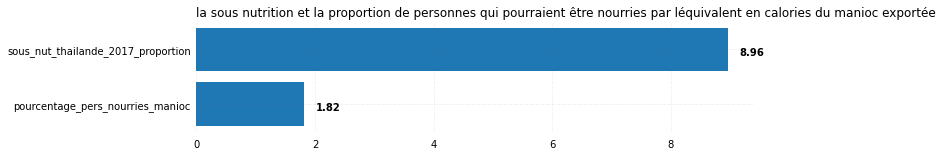

In [158]:
# un graphique en histogramme pour montrer le nombre de personnes qui pourraient être nourries du manioc
#et la sous nutrition en thailande

Mal_nourrie= df['sous_nutrition'].head(12)
Nombre= df['Nombre de personne et proportion'].head(12)
  
# Figure Size
fig, ax = plt.subplots(figsize=(10,2))
  
# Horizontal Bar Plot
ax.barh(Mal_nourrie, Nombre)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=2)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')
  
# Add Plot Title
ax.set_title('la sous nutrition et la proportion de personnes qui pourraient être nourries par léquivalent en calories du manioc exportée',
             loc='left', )
  
plt.show()

#### Conclusion 

#### Malgrès qu'on peut nourrir plus de 15 millions de personnes seulement par le Manioc , on a un pourcentage de 8.96% de mal-nourries en Thaîlande 

### Question3) l’utilisation des céréales, la répartition entre l’alimentation humaine et l’alimentation pour animaux

In [159]:
# affichage des colonnes nécessaires pour le calcul après
repartition_produit = dispo[['Zone', 'Produit', 'Nourriture','Aliments pour animaux']]
# Supprimer les NaN pour un visuel plus propre 
repartition_produit = repartition_produit[['Zone', 'Produit','Nourriture', 'Aliments pour animaux']].fillna(0)

In [160]:
# Trier les céréales de la colonne produit pour notre analyse
repartition_cereales=repartition_produit.loc[repartition_produit['Produit'].isin(['Seigle','Céréales, Autres','Avoine','Millet','Sorgho','Blé','Riz','Orge','Maïs'])]
repartition_cereales = repartition_cereales.reset_index().drop(columns=['index'])

In [161]:
# utiliser groupby .agg :sum pour grouper par zone et effectuer la somme dans plusieurs colonnes 
repartition_cereales=repartition_cereales.groupby(['Zone']).agg({'Nourriture':'sum','Aliments pour animaux':'sum'}).reset_index()

In [162]:
# Calculer la répartition alimentaire pour l'humain
repartition_cereales['répartition_alimentation_humaine'] = round((repartition_cereales['Nourriture'] / (repartition_cereales['Nourriture']  + repartition_cereales['Aliments pour animaux']))*100,2)
# Mettre en ordre décroissant les pays et la réparttion de l'alimentation humaine
repartition_cereales=repartition_cereales.sort_values(by='répartition_alimentation_humaine', ascending=False)
repartition_cereales

,Zone,Nourriture,Aliments pour animaux,répartition_alimentation_humaine
173,Îles Salomon,14.0,0.0,100.00
18,Bermudes,4.0,0.0,100.00
135,Saint-Kitts-et-Nevis,3.0,0.0,100.00
137,Sainte-Lucie,18.0,0.0,100.00
13,Bahamas,18.0,0.0,100.00
...,...,...,...,...
119,Pays-Bas,1440.0,7536.0,16.04
26,Bélarus,1010.0,5356.0,15.87
48,Espagne,4580.0,24925.0,15.52
31,Canada,3755.0,23905.0,13.58


In [163]:
# Afficher les pays qui ont 100% de céréales répartie pour l'alimentation humaine
cent_pour_cent=repartition_cereales.loc[repartition_cereales.répartition_alimentation_humaine>=95]

In [164]:
cent_pour_cent=cent_pour_cent.reset_index()

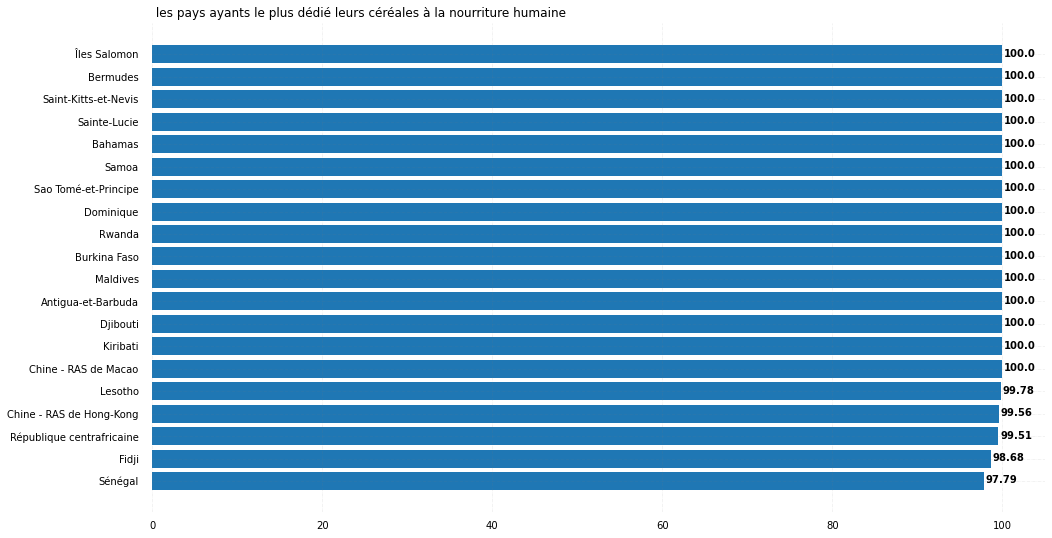

In [165]:
Zone = cent_pour_cent['Zone'].head(20)
Réparartition= cent_pour_cent['répartition_alimentation_humaine'].head(20)
  
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))
  
# Horizontal Bar Plot
ax.barh(Zone, Réparartition)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')
  
# Add Plot Title
ax.set_title(' les pays ayants le plus dédié leurs céréales à la nourriture humaine',
             loc='left', )
  

plt.show()

In [166]:
# Afficher les pays qui ont une répartition de céréales pour l'alimentation humaine <= 20% 
vingt_pour_cent=repartition_cereales.loc[repartition_cereales.répartition_alimentation_humaine<=20]


In [167]:
vingt_pour_cent=vingt_pour_cent.reset_index()

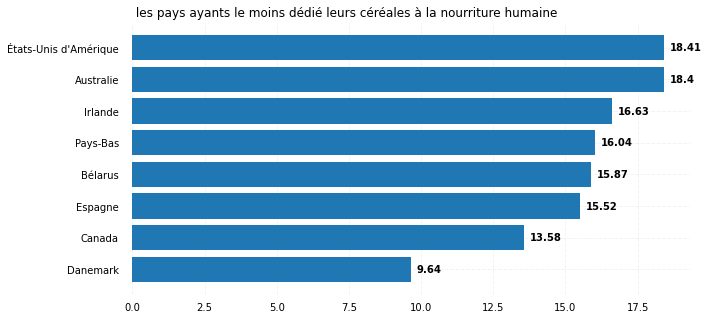

In [168]:
Zone = vingt_pour_cent['Zone'].head(20)
Réparartition= vingt_pour_cent['répartition_alimentation_humaine'].head(20)
  
# Figure Size
fig, ax = plt.subplots(figsize=(10,5))
  
# Horizontal Bar Plot
ax.barh(Zone, Réparartition)
  
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')
  
# Add Plot Title
ax.set_title(' les pays ayants le moins dédié leurs céréales à la nourriture humaine',
             loc='left', )
  

plt.show()

#### Conclusion

#### -->15 pays consacrent la totalité de leur production de céréales pour l’alimentation humaine:
#### En dehors du Burkina Faso, les 14 autres pays ont une très faible production, ils privilégient son utilisation pour l’alimentation humaine.

 #### -->8 pays consacrent moins de 20% de leur production de céréales pour l’alimentation humaine:
 #### Ce sont des gros producteurs de céréales dans l’absolu ou par rapport à la consommation de leur population en céréales.
